In [1]:
pip install pandas-datareader 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
BAC = data.DataReader("BAC",'stooq',start,end)

C = data.DataReader ("C", 'stooq', start, end)

GS = data.DataReader ("GS", 'stooq', start, end)

JPM = data.DataReader ("JPM", 'stooq', start, end)

MS = data.DataReader ("MS", 'stooq', start, end)

WFC = data.DataReader ("WFC", 'stooq', start, end)

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS','WFC']

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [9]:
bank_stocks.xs(key='Close', axis =1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns [tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()    

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


C:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



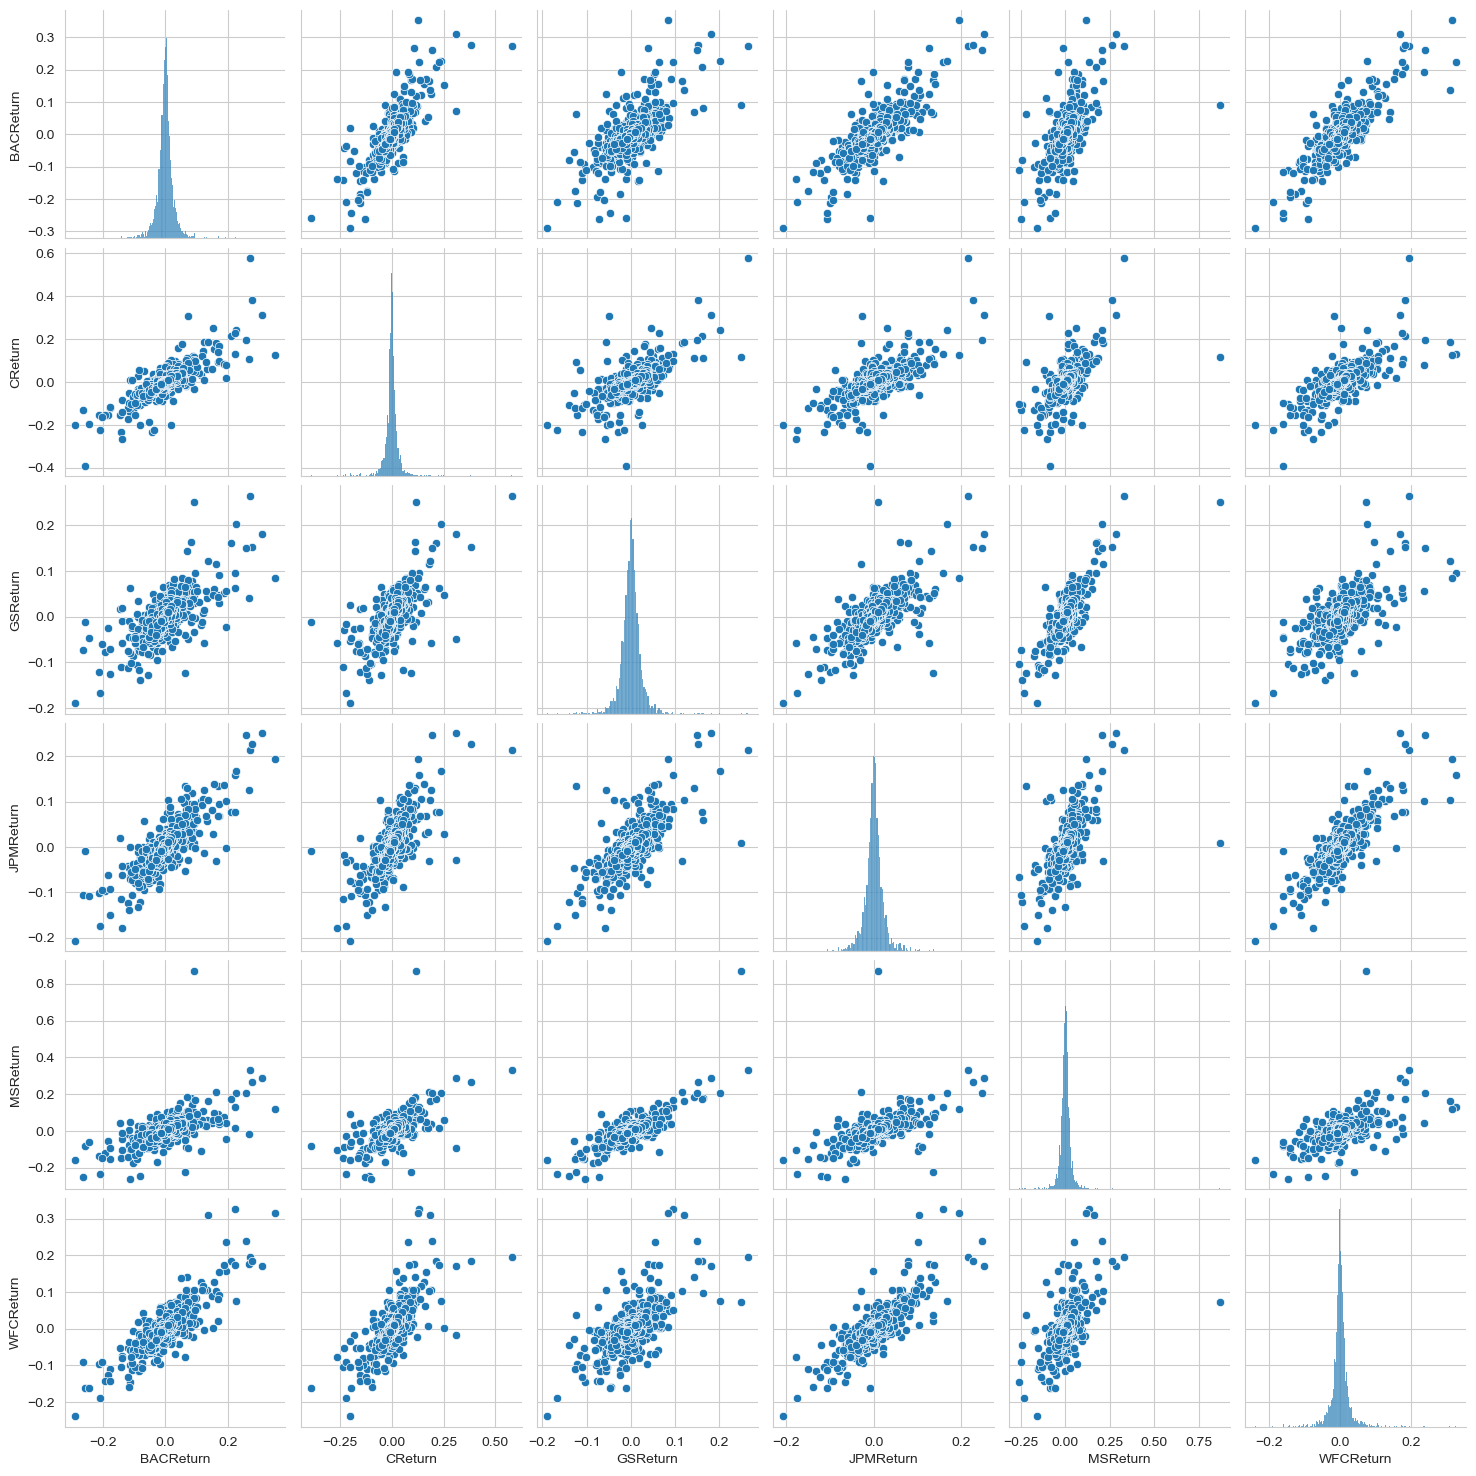

In [12]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [13]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [14]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.std()

BACReturn    0.036605
CReturn      0.038615
GSReturn     0.025371
JPMReturn    0.027670
MSReturn     0.037708
WFCReturn    0.030221
dtype: float64

In [16]:
returns['2015-01-01':'2015-12-31'].std()

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

C:\Users\ISHIKA\AppData\Local\Temp\ipykernel_5508\228992802.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




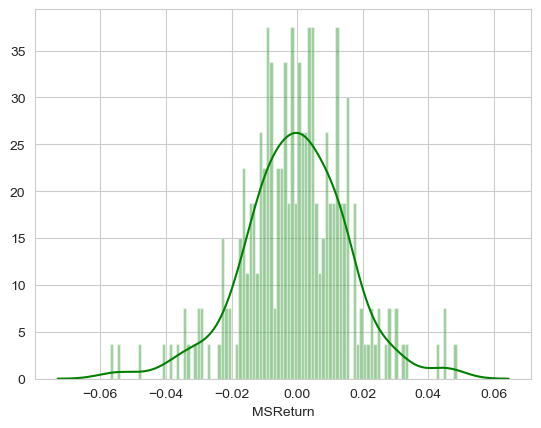

In [17]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MSReturn'], color = 'Green', bins = 100)
plt.ylabel("")
sns.set_style("darkgrid")

C:\Users\ISHIKA\AppData\Local\Temp\ipykernel_5508\2120066567.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CReturn', ylabel='Density'>

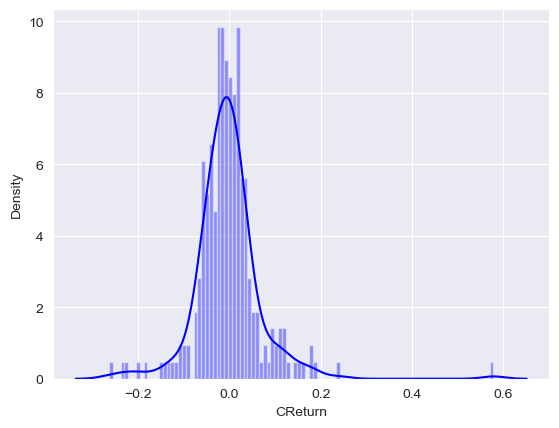

In [18]:
sns.distplot(returns['2008-01-01':'2008-12-31']['CReturn'], color ='blue', bins = 100)

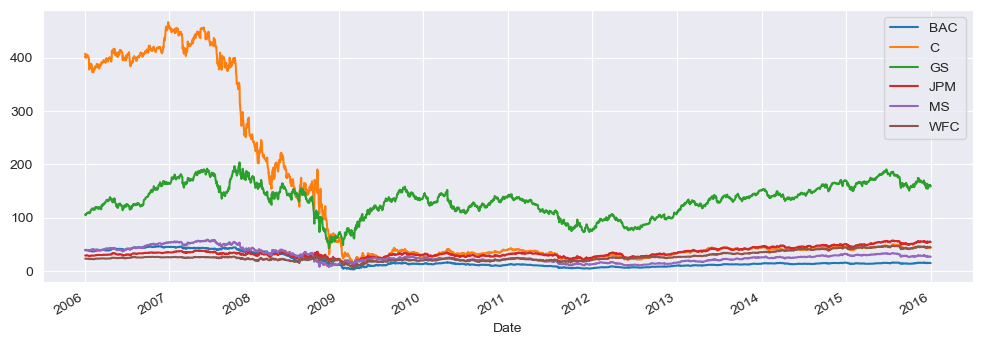

In [19]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label = tick)
plt.legend()

<Axes: xlabel='Date'>

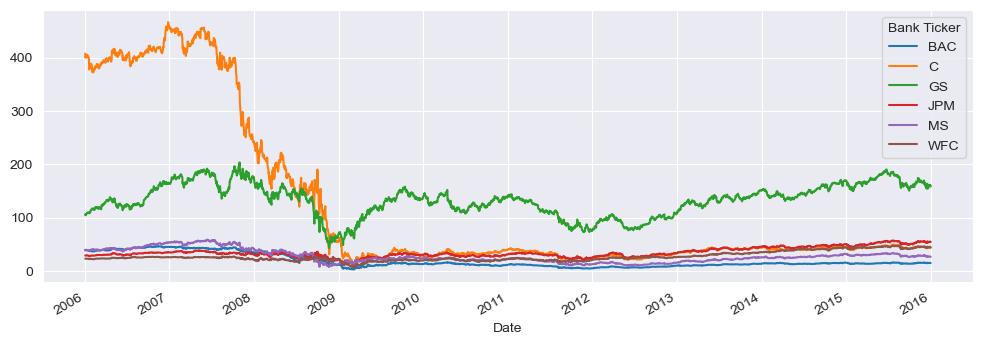

In [20]:
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').plot(figsize = (12,4))

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [22]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


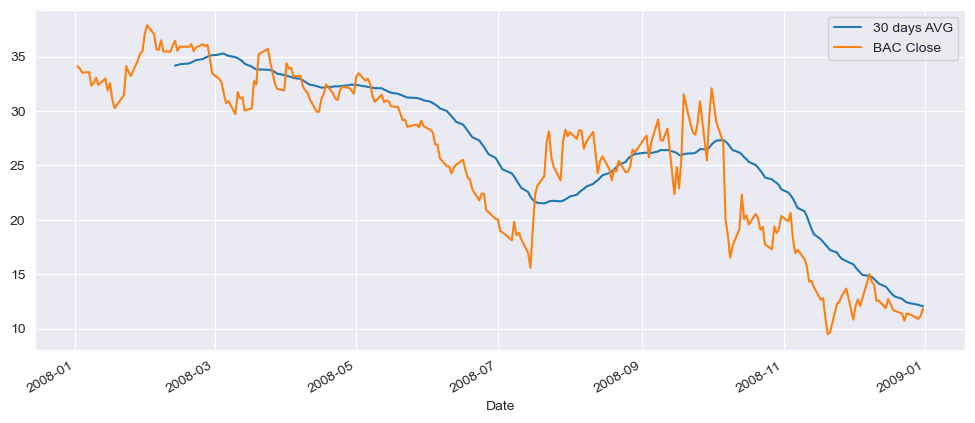

In [24]:
BAC = BAC.sort_index()
plt.figure(figsize=(12,5))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window= 30).mean().plot(label='30 days AVG')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

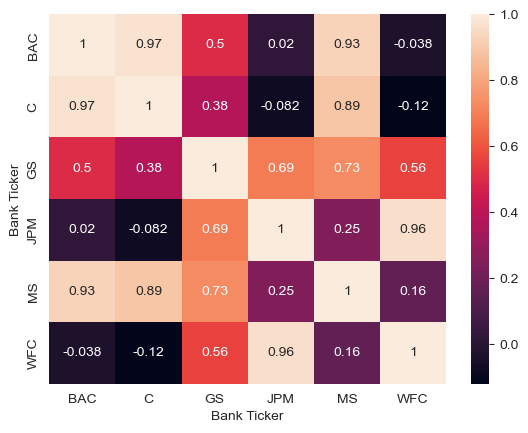

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis =1, level= 'Stock Info').corr(),annot= True)

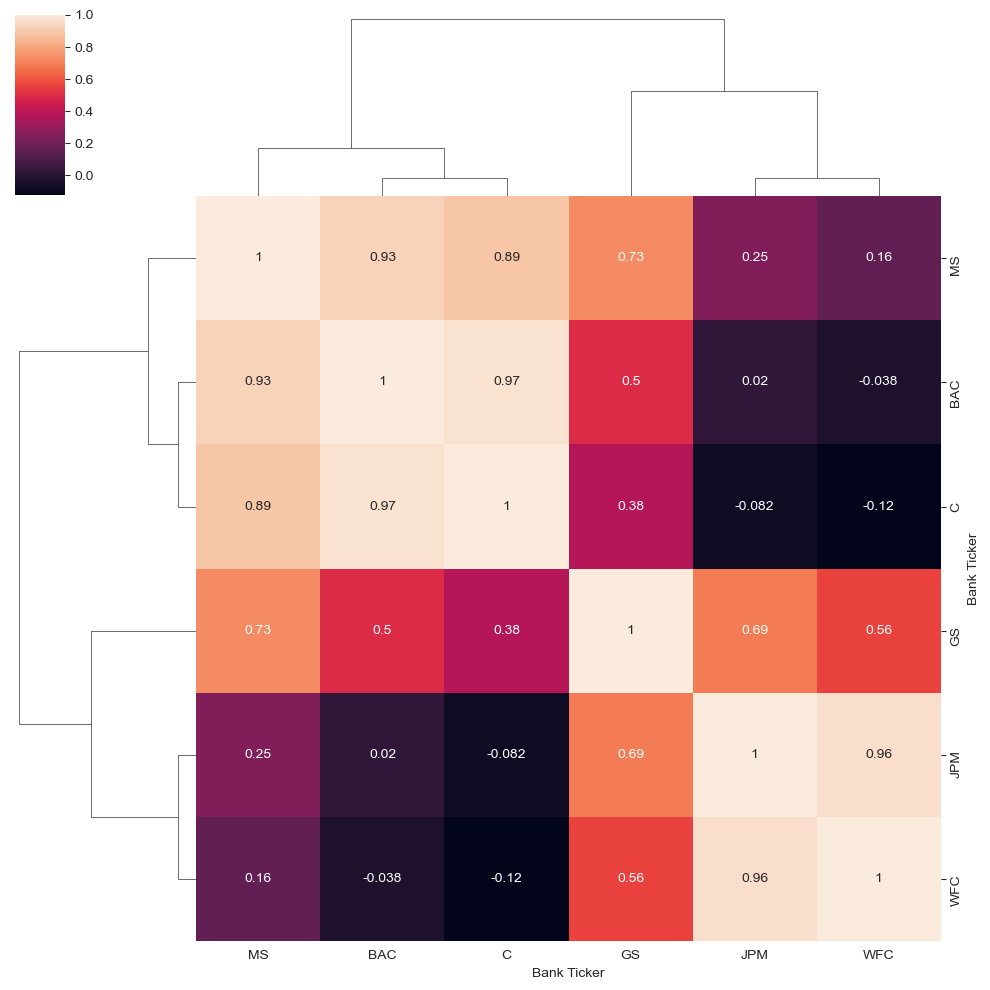

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [27]:
import cufflinks as cf
cf.go_offline()

In [28]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [29]:
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind = 'candle', legend = True)


In [30]:
MS = MS.sort_index()
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55], title ='Simple Moving Averages')

In [31]:
BAC = BAC.sort_index()
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')